(253680, 22)
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age 

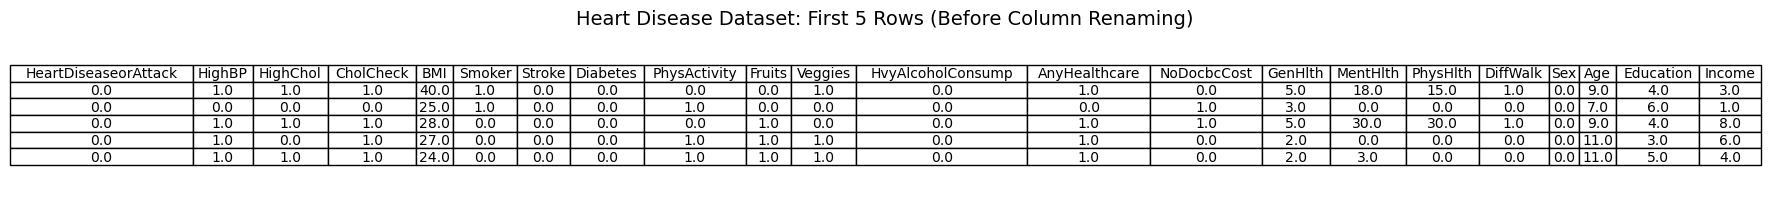

Categorical columns : []
Numerical columns : ['HeartDiseaseorAttack', 'Age', 'Diet', 'Smoking_Status', 'BMI', 'Diabetes', 'Stroke', 'HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex', 'Stress_Level']
         Age  Diet  Smoking_Status   BMI  Diabetes  Stroke  HighBP  HighChol  \
0        9.0   0.5             1.0  40.0       0.0     0.0     1.0       1.0   
1        7.0   0.0             1.0  25.0       0.0     0.0     0.0       0.0   
2        9.0   0.5             0.0  28.0       0.0     0.0     1.0       1.0   
3       11.0   1.0             0.0  27.0       0.0     0.0     1.0       0.0   
4       11.0   1.0             0.0  24.0       0.0     0.0     1.0       1.0   
...      ...   ...             ...   ...       ...     ...     ...       ...   
253675   5.0   1.0             0.0  45.0       0.0     0.0     1.0       1.0   
253676  11.0   0.0             0.0  18.0       2.0     0.0     1.0       1.0   
253677   2.0   0.5             0.0  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classifier Performance Metrics Comparison:
           Classifier   ROC-AUC  Precision    Recall  Accuracy  F1-Score
0  LogisticRegression  0.836177   0.746568  0.790550  0.761486  0.767930
1        RandomForest  0.981298   0.953429  0.919620  0.937453  0.936219
2    GradientBoosting  0.968711   0.911903  0.893836  0.903900  0.902779
3        DecisionTree  0.942027   0.938409  0.896931  0.919164  0.917202
4          NaiveBayes  0.800732   0.701462  0.830435  0.738933  0.760519
5                 KNN  0.949571   0.907385  0.918203  0.912386  0.912762
6            AdaBoost  0.881047   0.779988  0.828931  0.797889  0.803715
7    VotingClassifier  0.973624   0.898291  0.941873  0.917750  0.919566
Final Predictions (Majority Vote):
[ True  True False ... False False False]


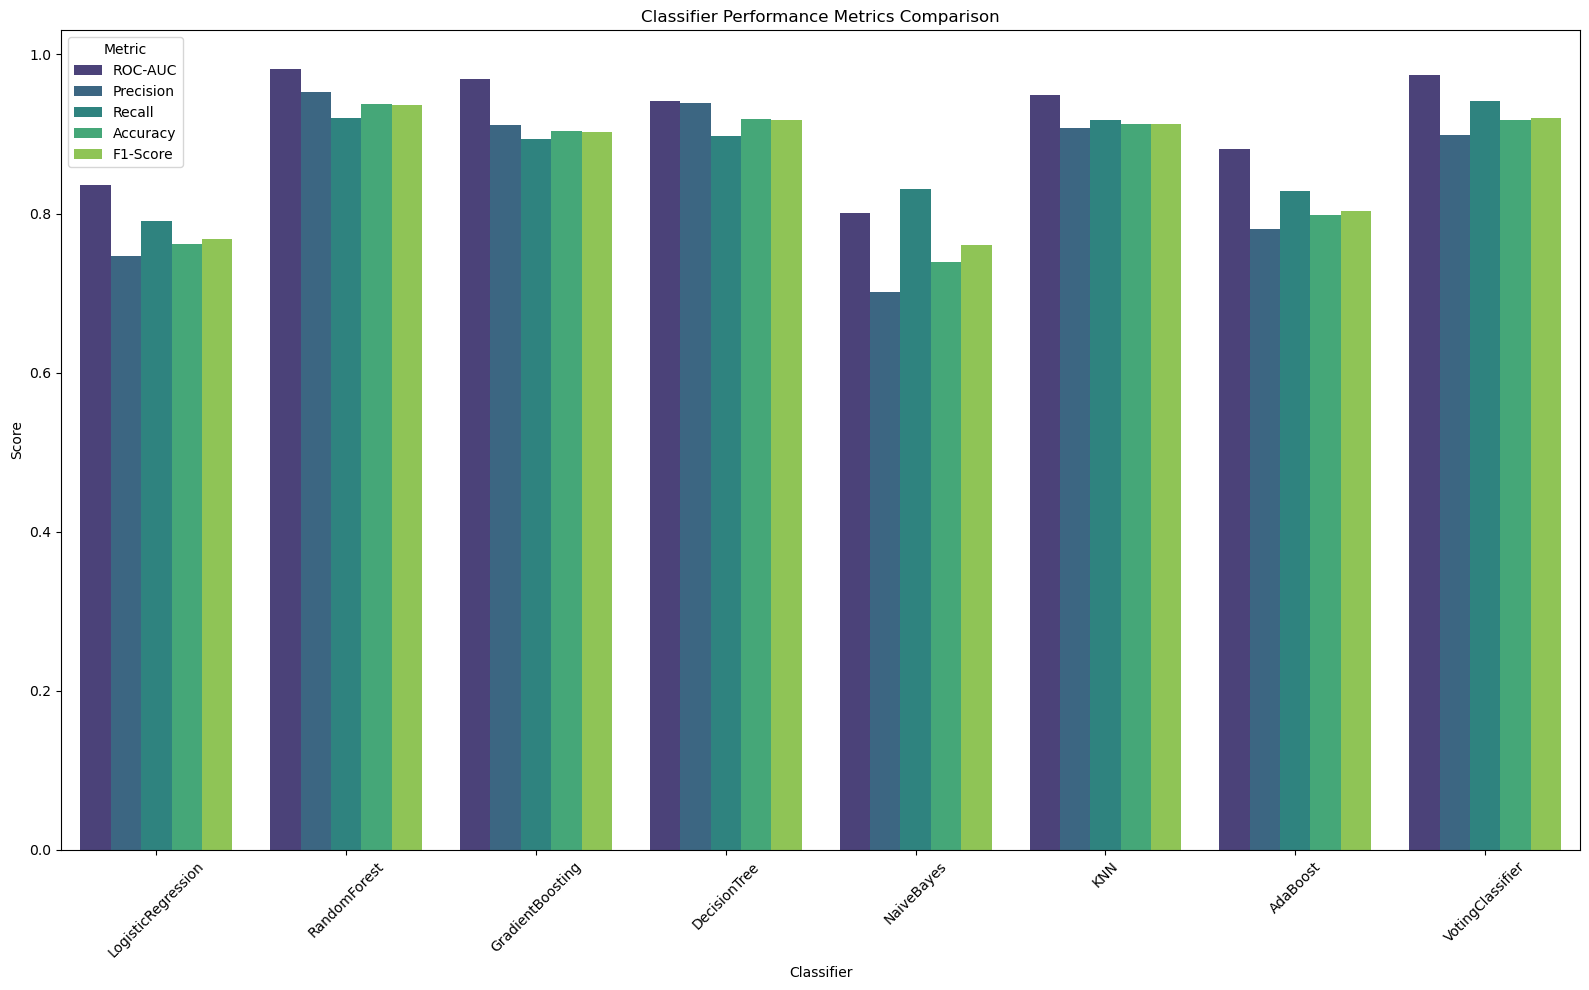

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import joblib  # For saving models

# Load the heart disease health indicators dataset
heart_disease_data = pd.read_csv("//Users/nethajivudugula/Downloads/heart_disease_health_indicators_BRFSS2015.csv")

# Display the basic information
print(heart_disease_data.shape)
print(heart_disease_data.head())
print(heart_disease_data.describe())

# Save head of the dataset as a table image
fig, ax = plt.subplots(figsize=(10,2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=heart_disease_data.head().values, colLabels=heart_disease_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(list(range(len(heart_disease_data.columns))))

plt.title("Heart Disease Dataset: First 5 Rows (Before Column Renaming)", fontsize=14, pad=10)
save_path = "heart_disease_data_head_1.png"
# plt.savefig(save_path, bbox_inches='tight')
plt.show()

# Rename columns based on the provided mapping
heart_disease_data.rename(columns={
    'Fruits': 'diet_fruits',
    'Veggies': 'diet_veggies',
    'Smoker': 'Smoking_Status',
    'Diabetes_012': 'Diabetes'
}, inplace=True)

# Combine 'Fruits' and 'Veggies' into a single 'diet' column
heart_disease_data['Diet'] = heart_disease_data[['diet_fruits', 'diet_veggies']].mean(axis=1)
heart_disease_data.drop(columns=['diet_fruits', 'diet_veggies'], inplace=True)

# Combine 'Stress' columns into a single 'Stress_Level' column
stress_columns = ['MentHlth', 'PhysHlth', 'GenHlth', 'Income', 'NoDocbcCost', 'DiffWalk']
heart_disease_data['Stress_Level'] = heart_disease_data[stress_columns].mean(axis=1)
heart_disease_data.drop(columns=stress_columns, inplace=True)

# Select only the relevant numerical columns
numerical_columns = ['HeartDiseaseorAttack','Age', 'Diet','Smoking_Status', 'BMI','Diabetes', 'Stroke', 'HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex','Stress_Level']

heart_disease_data = heart_disease_data[numerical_columns]

# Handle missing values by dropping rows with any missing data
heart_disease_data.dropna(inplace=True)

# Check for categorical and numerical columns
cat_col = [col for col in heart_disease_data.columns if heart_disease_data[col].dtype == 'object']
num_col = [col for col in heart_disease_data.columns if heart_disease_data[col].dtype != 'object']
print('Categorical columns :', cat_col)
print('Numerical columns :', num_col)

# Split data into features (X) and target (y)
X = heart_disease_data.drop(columns=['HeartDiseaseorAttack'])
y = heart_disease_data['HeartDiseaseorAttack']

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data and retain feature names
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print(X)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

# Initialize classifiers with names for saving models
classifiers = {
    'LogisticRegression': LogisticRegression(C=10, solver='liblinear', random_state=42),
    'RandomForest': RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=4, min_samples_split=2, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan'),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
    'VotingClassifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(C=10, solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=None, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')),
        ('ad', AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)),
    ], voting='soft')
}

# Train each classifier and evaluate performance
results = []
final_predictions = []
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    
    # Collect metrics
    scores = {
        'Classifier': name,
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    results.append(scores)

    # For consistent predictions across classifiers, use majority vote or common logic
    # Collect all predictions and use majority voting or common threshold
    final_predictions.append(y_pred)

    


# Perform majority voting on predictions across classifiers
import numpy as np
final_majority_vote = np.mean(final_predictions, axis=0) > 0.5  # Majority vote (0.5 threshold)

# Display results of classifiers' metrics
results_df = pd.DataFrame(results)
print("Classifier Performance Metrics Comparison:")
print(results_df)

# Save or display final unified prediction
print("Final Predictions (Majority Vote):")
print(final_majority_vote)

# Optional: Plot the classifier performance
plt.figure(figsize=(16, 10))
sns.barplot(
    data=results_df.melt(
        id_vars='Classifier', 
        value_vars=['ROC-AUC', 'Precision', 'Recall', 'Accuracy', 'F1-Score'], 
        var_name='Metric', 
        value_name='Score'
    ), 
    x='Classifier', 
    y='Score', 
    hue='Metric', 
    palette='viridis'
)
plt.title('Classifier Performance Metrics Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Classifier_Performance.png', dpi=300)
plt.show()

    


In [2]:
# Collect accuracy values for each classifier
classifier_accuracies = {name: accuracy_score(y_test, clf.predict(X_test_scaled)) for name, clf in classifiers.items()}

# Save the dictionary to a joblib file
joblib.dump(classifier_accuracies, 'classifier_accuracies.pkl')


['classifier_accuracies.pkl']

Feature importances for RandomForest:


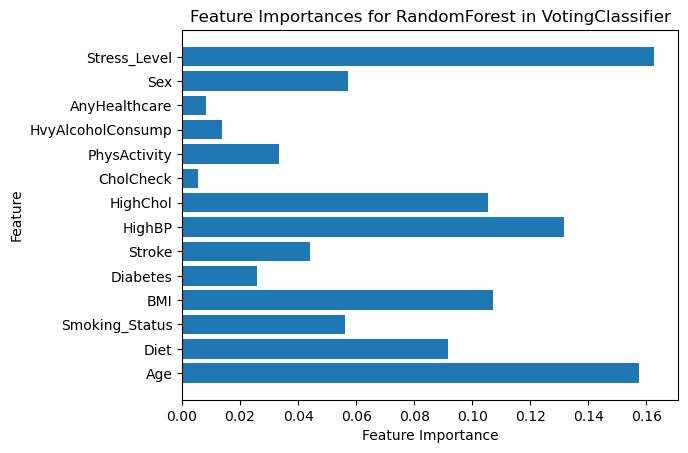

In [4]:
# Assuming your VotingClassifier is named 'clf'
from sklearn.ensemble import RandomForestClassifier

# Example of getting feature importances from a RandomForest classifier inside the VotingClassifier
for model in clf.estimators_:
    if isinstance(model, RandomForestClassifier):
        print("Feature importances for RandomForest:")
        importances = model.feature_importances_
        # Assuming X is a DataFrame, you can plot the feature importances like this:
        features = X.columns
        plt.barh(features, importances)
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importances for RandomForest in VotingClassifier')
        plt.show()


Feature importances for LogisticRegression:


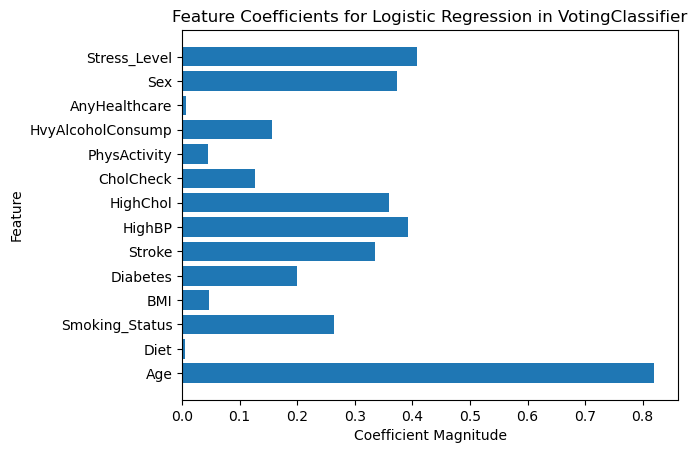

In [8]:
import numpy as np
# Example of getting feature importances from Logistic Regression inside the VotingClassifier
for model in clf.estimators_:
    if isinstance(model, LogisticRegression):
        print("Feature importances for LogisticRegression:")
        # LogisticRegression uses coef_ instead of feature_importances_
        importances = np.abs(model.coef_[0])  # For binary classification, it's in the first row
        features = X.columns  # Assuming X is a DataFrame
        plt.barh(features, importances)
        plt.xlabel('Coefficient Magnitude')
        plt.ylabel('Feature')
        plt.title('Feature Coefficients for Logistic Regression in VotingClassifier')
        plt.show()


LogisticRegression feature importances or coefficients:
Feature coefficients: [ 0.27095114 -0.0693827   0.43882813  0.00780059  0.24471629  1.17032227
  0.6513737   0.6299581   0.49452203 -0.13241743 -0.40024828 -0.2282069
  0.67090626  0.13508367]


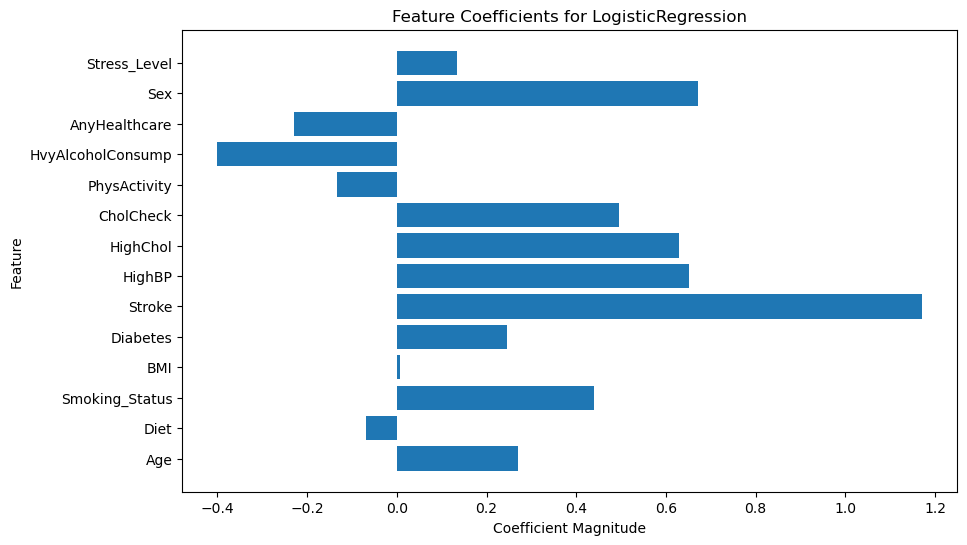


RandomForest feature importances or coefficients:
Feature importances: [0.13062563 0.04736233 0.02031136 0.28553753 0.0353921  0.04976212
 0.04500151 0.03197816 0.00509914 0.01958315 0.00979779 0.00981657
 0.02523203 0.28450058]


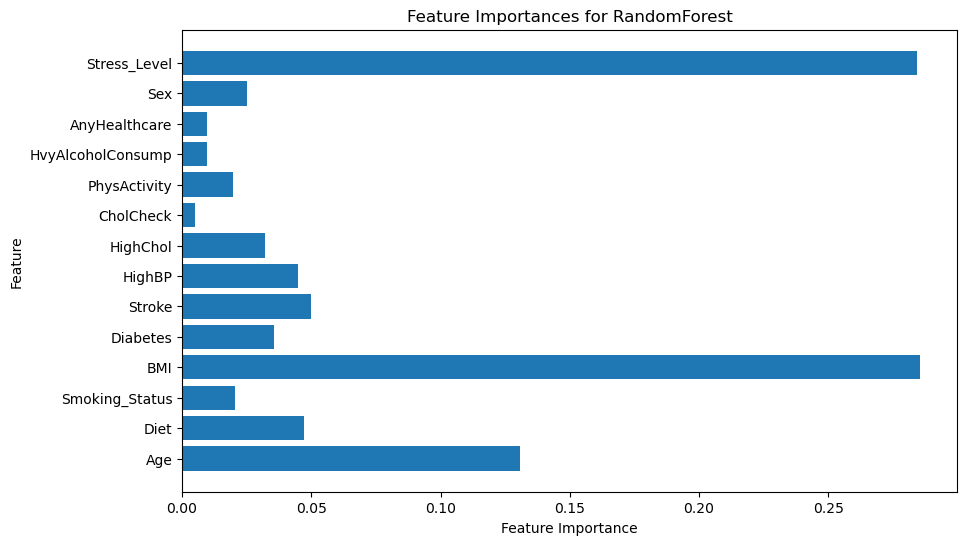


GradientBoosting feature importances or coefficients:
Feature importances: [0.21324831 0.00119718 0.03375722 0.00876012 0.07748193 0.15112601
 0.21558869 0.0825026  0.0013116  0.00400076 0.00406606 0.00068442
 0.07934939 0.1269257 ]


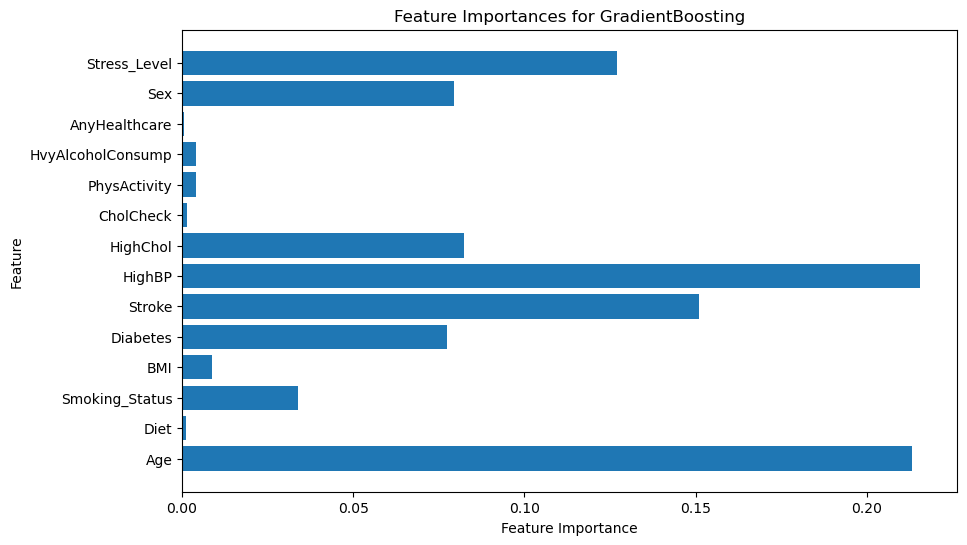


DecisionTree feature importances or coefficients:
Feature importances: [0.10315602 0.07711139 0.02990026 0.26266297 0.02605784 0.04925998
 0.07205163 0.03013252 0.00296912 0.04514645 0.00960863 0.00683806
 0.03037413 0.25473101]


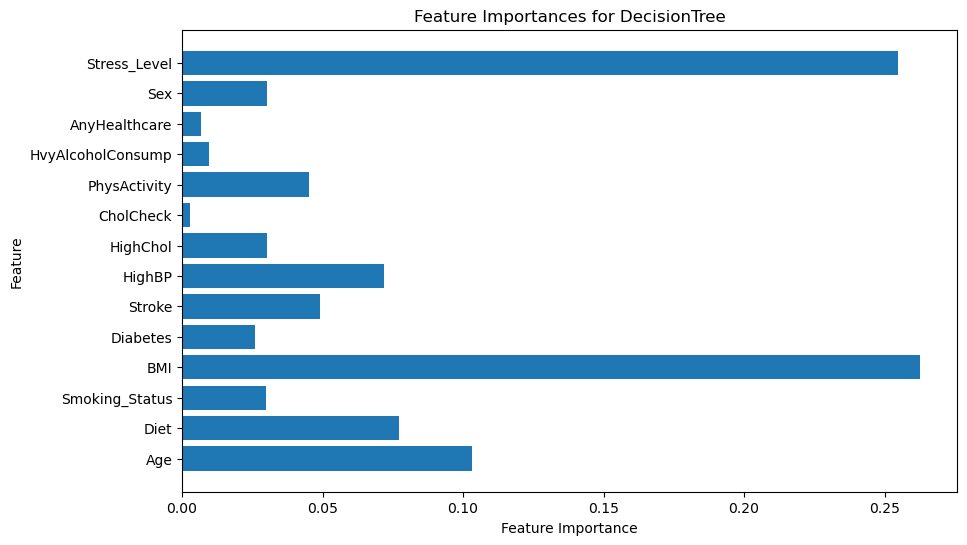


NaiveBayes feature importances or coefficients:

KNN feature importances or coefficients:

AdaBoost feature importances or coefficients:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Feature importances: [0.29 0.   0.08 0.   0.07 0.1  0.08 0.09 0.   0.01 0.   0.   0.11 0.17]


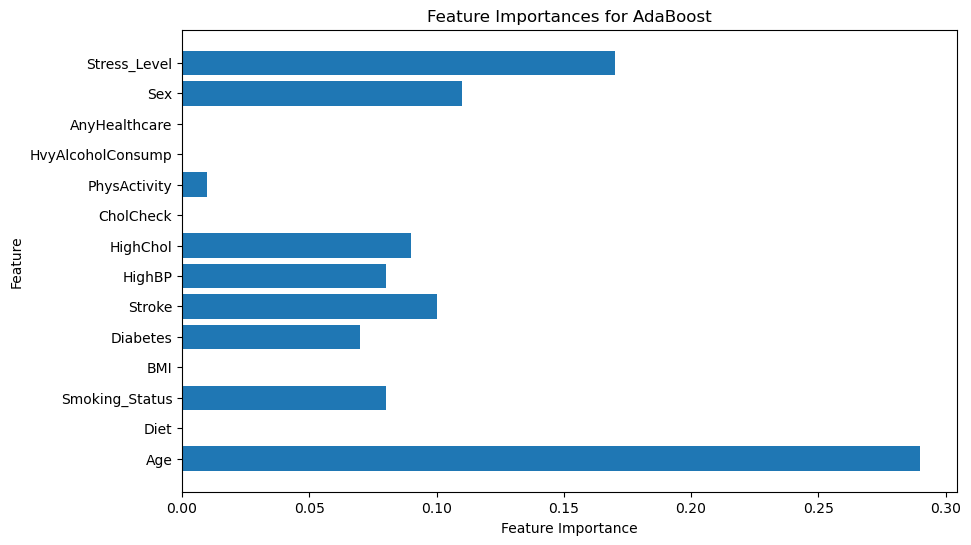


VotingClassifier feature importances or coefficients:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [9]:
# Fit all classifiers and print feature importances or coefficients
for name, clf in classifiers.items():
    print(f"\n{name} feature importances or coefficients:")
    clf.fit(X, y)
    
    if hasattr(clf, 'feature_importances_'):  # RandomForest, DecisionTree, GradientBoosting, VotingClassifier
        importances = clf.feature_importances_
        print("Feature importances:", importances)
        
        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.barh(X.columns, importances)
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()
    
    elif hasattr(clf, 'coef_'):  # LogisticRegression, NaiveBayes (and others like SVC)
        if hasattr(clf, 'coef_'):
            coef = clf.coef_.flatten()  # For Logistic Regression, flatten the coefficients
            print("Feature coefficients:", coef)
            
            # Plot the coefficients
            plt.figure(figsize=(10, 6))
            plt.barh(X.columns, coef)
            plt.title(f'Feature Coefficients for {name}')
            plt.xlabel('Coefficient Magnitude')
            plt.ylabel('Feature')
            plt.show()